<a href="https://colab.research.google.com/github/Nawal-rind/NLP-text-classification-using-Naive-Bayes/blob/main/Life_Expectancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Life Expectancy Data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [4]:
del df['Schooling']

In [5]:
del df['infant deaths']
del df['GDP']
del df['Population']
del df['Status']
del df['percentage expenditure']
del df['Year']
del df['Country']
del df['Income composition of resources']
del df['under-five deaths ']

In [6]:
df.isnull().sum().sum()

np.int64(1133)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Life expectancy        2928 non-null   float64
 1   Adult Mortality        2928 non-null   float64
 2   Alcohol                2744 non-null   float64
 3   Hepatitis B            2385 non-null   float64
 4   Measles                2938 non-null   int64  
 5    BMI                   2904 non-null   float64
 6   Polio                  2919 non-null   float64
 7   Total expenditure      2712 non-null   float64
 8   Diphtheria             2919 non-null   float64
 9    HIV/AIDS              2938 non-null   float64
 10   thinness  1-19 years  2904 non-null   float64
 11   thinness 5-9 years    2904 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 275.6 KB


In [8]:
df.isnull().mean()* 100

,0
Life expectancy,0.340368
Adult Mortality,0.340368
Alcohol,6.603131
Hepatitis B,18.822328
Measles,0.000000
BMI,1.157250
Polio,0.646698
Total expenditure,7.692308
Diphtheria,0.646698
HIV/AIDS,0.000000


In [9]:
df.dropna()

,Life expectancy,Adult Mortality,Alcohol,Hepatitis B,Measles,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years
0,65.0,263.0,0.01,65.0,1154,19.1,6.0,8.16,65.0,0.1,17.2,17.3
1,59.9,271.0,0.01,62.0,492,18.6,58.0,8.18,62.0,0.1,17.5,17.5
2,59.9,268.0,0.01,64.0,430,18.1,62.0,8.13,64.0,0.1,17.7,17.7
3,59.5,272.0,0.01,67.0,2787,17.6,67.0,8.52,67.0,0.1,17.9,18.0
4,59.2,275.0,0.01,68.0,3013,17.2,68.0,7.87,68.0,0.1,18.2,18.2
...,...,...,...,...,...,...,...,...,...,...,...,...
2933,44.3,723.0,4.36,68.0,31,27.1,67.0,7.13,65.0,33.6,9.4,9.4
2934,44.5,715.0,4.06,7.0,998,26.7,7.0,6.52,68.0,36.7,9.8,9.9
2935,44.8,73.0,4.43,73.0,304,26.3,73.0,6.53,71.0,39.8,1.2,1.3
2936,45.3,686.0,1.72,76.0,529,25.9,76.0,6.16,75.0,42.1,1.6,1.7


In [10]:
df.columns = (
    df.columns
      .str.strip()
      .str.replace(' ', '_')
      .str.lower()
)

In [11]:
df = df.rename(columns={'hiv/aids': 'hiv_aids'})

In [12]:
df['life_expectancy'] = pd.to_numeric(df['life_expectancy'], errors='coerce').round().astype('Int64')

In [13]:
df['adult_mortality'] = pd.to_numeric(df['adult_mortality'], errors= 'coerce').round().astype('Int64')
df['alcohol'] = pd.to_numeric(df['alcohol'], errors= 'coerce').round().astype('Int64')
df['hepatitis_b'] = pd.to_numeric(df['hepatitis_b'], errors= 'coerce').round().astype('Int64')
df['measles'] = pd.to_numeric(df['measles'], errors= 'coerce').round().astype('Int64')
df['bmi'] = pd.to_numeric(df['bmi'], errors= 'coerce').round().astype('Int64')
df['polio'] = pd.to_numeric(df['polio'], errors= 'coerce').round().astype('Int64')
df['total_expenditure'] = pd.to_numeric(df['total_expenditure'], errors= 'coerce').round().astype('Int64')
df['diphtheria'] = pd.to_numeric(df['diphtheria'], errors= 'coerce').round().astype('Int64')
df['adult_mortality'] = pd.to_numeric(df['adult_mortality'], errors= 'coerce').round().astype('Int64')
df['thinness__1-19_years'] = pd.to_numeric(df['thinness__1-19_years'], errors= 'coerce').round().astype('Int64')
df['thinness_5-9_years'] = pd.to_numeric(df['thinness_5-9_years'], errors= 'coerce').round().astype('Int64')
df['hiv_aids'] = pd.to_numeric(df['hiv_aids'], errors= 'coerce').round().astype('Int64')

In [14]:
del df['hiv_aids']

In [15]:
df = df.loc[~df.isna().any(axis=1)]

In [16]:
df.head(2)

,life_expectancy,adult_mortality,alcohol,hepatitis_b,measles,bmi,polio,total_expenditure,diphtheria,thinness__1-19_years,thinness_5-9_years
0,65,263,0,65,1154,19,6,8,65,17,17
1,60,271,0,62,492,19,58,8,62,18,18


In [17]:
X = df.drop('life_expectancy', axis=1).values
y = df['life_expectancy'].values

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [21]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

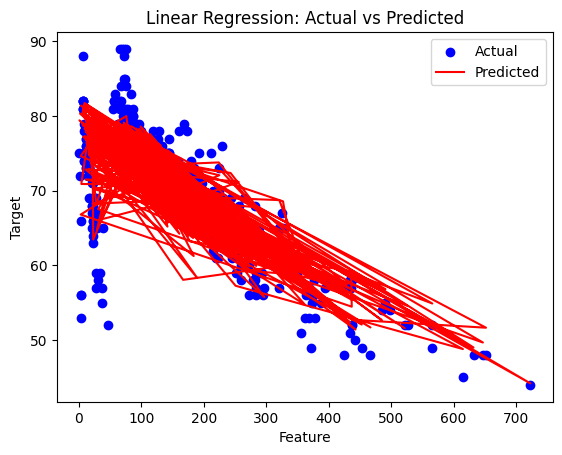

In [23]:
plt.scatter(X_test[:, 0], y_test, color='blue', label='Actual')
plt.plot(X_test[:, 0], y_pred, color='red', label='Predicted')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()
plt.show()

In [24]:
print("Slope (coefficients):", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mse)
print("R² Score:", r2)

Slope (coefficients): [-3.93537355e-02  3.18736423e-01  9.83672403e-04 -1.29332535e-05
  7.92570584e-02  3.28077702e-02 -7.28400297e-02  4.46776074e-02
 -1.30938408e-01 -7.47679218e-02]
Intercept: 66.43741970475908
Mean Squared Error: 23.38560032673439
R² Score: 0.6783331592133718
